데이터셋
1. 기상상황 
    1-1 기온
    1-2 습도
    1-3 강수량/장마기간
2. 모기지표
    1-1 일본뇌염/말라리아모기 발생밀도
    1-2 일본뇌염 말라리아 발병수
    1-3 서울 모기지표(미정)

In [405]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
from matplotlib.ticker import ScalarFormatter

In [406]:
jb_msDF = pd.DataFrame(pd.read_excel('./data/일본뇌염 1624.xlsx', index_col=0))
ma_msDF = pd.DataFrame(pd.read_excel('./data/말라리아1624.xlsx', index_col=0))


In [407]:
jb_msDF.info()


<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 13 to 44
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   2014 Total   31 non-null     float64
 1   2014 CT      31 non-null     float64
 2   2015 Total   31 non-null     float64
 3   2015 CT      31 non-null     float64
 4   2016년 전체모기   31 non-null     float64
 5   2016년 매개모기   31 non-null     float64
 6   2017년 전체모기   31 non-null     float64
 7   2017년 매개모기   31 non-null     float64
 8   2018년 전체모기   31 non-null     float64
 9   2018년 매개모기   31 non-null     float64
 10  2019 전체모기    31 non-null     float64
 11  2019 매개모기    31 non-null     float64
 12  2020 전체모기    31 non-null     float64
 13  2020 매개모기    31 non-null     float64
 14  2021전체       32 non-null     object 
 15  2021 매개모기    32 non-null     object 
 16  2022 전체모기    32 non-null     int64  
 17   2022 매개모기   32 non-null     int64  
 18  2023년 전체 모기  32 non-null     int64  
 19  2023년 매개 모기  3

In [408]:
jb_msDF = jb_msDF.replace('-',0)
jb_msDF.isna().sum()
jb_msDF = jb_msDF.fillna(0)

C:\Users\matdo\AppData\Local\Temp\ipykernel_1388\3898860325.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  jb_msDF = jb_msDF.replace('-',0)


In [409]:
jb_msDF = jb_msDF.astype('int')
jb_msDF.index = list(range(13,45))

In [410]:
jb_msDF.drop(index=13, inplace=True)


In [411]:
jb_msDF.head()

,2014 Total,2014 CT,2015 Total,2015 CT,2016년 전체모기,2016년 매개모기,2017년 전체모기,2017년 매개모기,2018년 전체모기,2018년 매개모기,...,2021전체,2021 매개모기,2022 전체모기,2022 매개모기,2023년 전체 모기,2023년 매개 모기,2024년 전체 모기,2024년 매개 모기,평년전체모기,평년매개모기
14,2,0,1,0,1,0,2,0,1,0,...,3,1,1,0,7,2,11,9,5,0
15,5,0,1,0,2,0,4,1,2,0,...,3,1,1,0,2,0,5,2,2,1
16,4,0,1,0,3,0,3,1,19,0,...,16,3,5,2,5,1,6,3,12,1
17,8,0,7,0,6,0,4,1,152,0,...,28,1,1,0,2,0,4,0,44,0
18,13,0,18,0,27,0,14,0,113,3,...,50,0,13,0,14,0,9,0,34,0


In [412]:
ma_msDF = ma_msDF.replace('-',0)
ma_msDF.isna().sum()
ma_msDF = ma_msDF.fillna(0)

C:\Users\matdo\AppData\Local\Temp\ipykernel_1388\3381432693.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ma_msDF = ma_msDF.replace('-',0)


In [413]:
ma_msDF = ma_msDF.astype('int')
ma_msDF.index = list(range(14,45))
ma_msDF.head()

,2014년 전체 모기,2014년 말라리아 매개 모기,2015년 전체 모기,2015년 말라리아 매개 모기,2016년 전체모기,2016년 매개모기,2017년 전체모기,2017년 매개모기,2018년 전체모기,2018년 매개모기,...,2021 전체모기,2021 매개모기,2022년 전체모기,2022년 매개모기,2023년 전체모기,2023년 매개모기,2024년 전체모기,2024년 매개모기,평년 전체모기,평년 매개모기
14,0,0,0,0,1,0,2,0,1,0,...,1,0,0,0,0,0,0,0,0,0
15,0,0,0,0,2,0,4,1,0,0,...,1,0,1,0,0,0,0,0,0,0
16,1,0,1,0,3,0,3,1,1,0,...,0,0,3,0,1,0,0,0,1,0
17,1,0,1,0,6,0,4,1,1,0,...,1,0,2,0,1,0,0,0,1,0
18,0,0,1,0,27,0,14,0,1,0,...,2,0,3,0,2,0,1,0,1,0


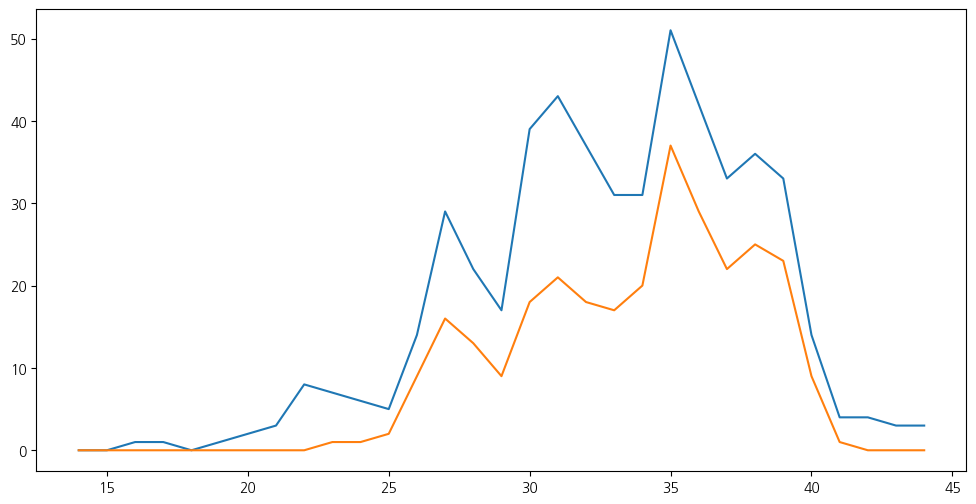

In [414]:
plt.figure(figsize=(12,6))

plt.plot(ma_msDF.index, ma_msDF['2014년 전체 모기'])
plt.plot(ma_msDF.index, ma_msDF['2014년 말라리아 매개 모기'])

In [415]:
pjTempDF = pd.DataFrame(pd.read_excel('./data/경기도_파주_1424_기온_일별.xlsx'))
pjTempDF.head()
pjTempDF.columns = ['날짜', '지점', '평균기온','최저기온', '최고기온']

In [416]:
pjTempDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      4018 non-null   datetime64[ns]
 1   지점      4018 non-null   int64         
 2   평균기온    4009 non-null   float64       
 3   최저기온    4017 non-null   float64       
 4   최고기온    4017 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 157.1 KB


In [417]:
pjTempDF['연도'] = pjTempDF['날짜'].dt.year
pjTempDF['주차'] = pjTempDF['날짜'].dt.isocalendar().week

weekly_Temp = pjTempDF.groupby(['연도','주차']).agg({'최고기온': 'mean'}).reset_index()

# 결과 출력
print(weekly_Temp)

       연도  주차      최고기온
0    2014   1  4.912500
1    2014   2  1.571429
2    2014   3  1.400000
3    2014   4  2.871429
4    2014   5  4.928571
..    ...  ..       ...
571  2024  48  7.142857
572  2024  49  5.714286
573  2024  50  4.528571
574  2024  51  1.257143
575  2024  52  2.342857

[576 rows x 3 columns]


In [418]:
pjRainDF = pd.DataFrame(pd.read_excel('./data/경기도_파주_1424_강수량_일별.xlsx'))
pjRainDF.head()

,날짜,지점,강수량
0,2014-01-01,99,NaN
1,2014-01-02,99,NaN
2,2014-01-03,99,NaN
3,2014-01-04,99,NaN
4,2014-01-05,99,NaN


In [419]:
pjRainDF = pjRainDF.fillna(0)

In [420]:
pjRainDF['연도'] = pjRainDF['날짜'].dt.year
pjRainDF['주차'] = pjRainDF['날짜'].dt.isocalendar().week

weekly_rainfall = pjRainDF.groupby(['연도','주차']).agg({'강수량': 'sum'}).reset_index()

weekly_rainfall

,연도,주차,강수량
0,2014,1,0.0
1,2014,2,0.4
2,2014,3,0.0
3,2014,4,5.6
4,2014,5,17.9
...,...,...,...
571,2024,48,15.8
572,2024,49,1.1
573,2024,50,0.0
574,2024,51,3.8


In [421]:
wrf2014 =  weekly_rainfall[weekly_rainfall.loc[:,'연도']==2014]
wte2014 =  weekly_Temp[weekly_Temp.loc[:,'연도']==2014]

In [422]:
def temp_time(year1):
    tempSR = weekly_Temp[weekly_Temp.loc[:,'연도'].dt.year==year1]
    return tempSR

In [423]:
def rain_time(year1):
    rainSR = weekly_Temp[weekly_Temp.loc[:,'연도'].dt.year==year1]
    return rainSR

<BarContainer object of 52 artists>

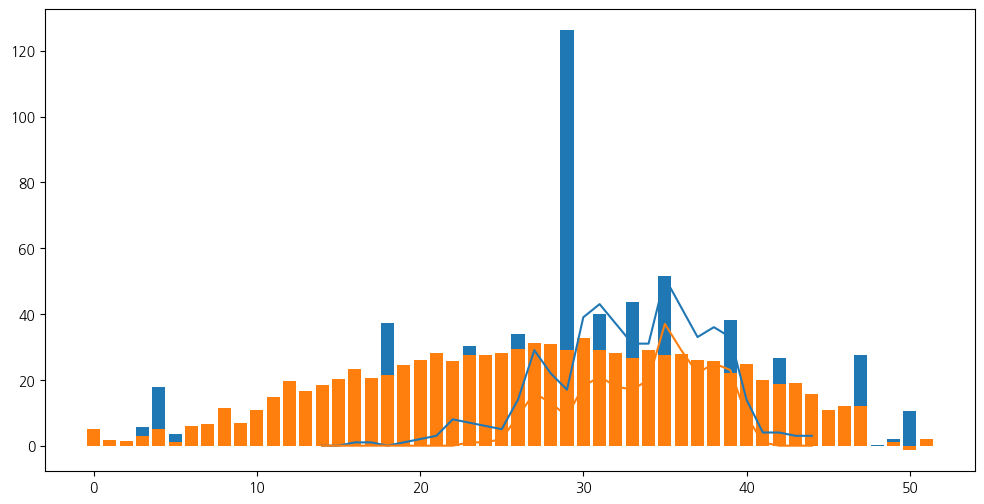

In [424]:
plt.figure(figsize=(12,6))
plt.plot(ma_msDF.index, ma_msDF['2014년 전체 모기'])
plt.plot(ma_msDF.index, ma_msDF['2014년 말라리아 매개 모기'])
plt.bar(wrf2014.index,wrf2014['강수량'])
plt.bar(wte2014.index,wte2014['최고기온'])

In [425]:
""" 
41~44주차 모기 밀도를 10년에 걸쳐서 보여주기
          기온도 가져와서 보여주기
"""

' \n41~44주차 모기 밀도를 10년에 걸쳐서 보여주기\n          기온도 가져와서 보여주기\n'

In [426]:
temp3_max_dict = {}
for i in range(2014,2025):
    max_idx = pjTempDF.loc[
        ((pjTempDF['연도']==i) & ((pjTempDF['주차']<=12) & (pjTempDF['주차']>=8))) ,
        '최고기온'].idxmax()
    temp3_max_dict[pjTempDF.loc[max_idx, '연도']] = pjTempDF.loc[max_idx, '최고기온']
tem3SRm = pd.Series(temp3_max_dict)
tem3SRm

2014    19.5
2015    21.3
2016    20.0
2017    18.8
2018    20.6
2019    15.6
2020    17.1
2021    19.8
2022    19.4
2023    23.7
2024    23.1
dtype: float64

In [427]:
temp3_mean_dict = {}
for i in range(2014,2025):
    mean_idx = pjTempDF.loc[
        ((pjTempDF['연도']==i) & ((pjTempDF['주차']<=12) & (pjTempDF['주차']>=8))) ,
        '평균기온'].idxmax()
    temp3_mean_dict[pjTempDF.loc[mean_idx, '연도']] = pjTempDF.loc[mean_idx, '평균기온']
tem3SR = pd.Series(temp3_mean_dict)
tem3SR

2014    10.1
2015    10.4
2016    11.9
2017     7.4
2018    14.3
2019     7.3
2020    11.3
2021    12.9
2022    11.6
2023    15.0
2024    13.7
dtype: float64

In [458]:
rf3_mean_dict = {}
for i in range(2014,2025):
    month_rf = pjRainDF.loc[
        ((pjRainDF['연도']==i) & ((pjRainDF['주차']<=28) & (pjRainDF['주차']>=24))) ,
        '강수량'].sum()
    rf3_mean_dict[i] = month_rf
rf3S = pd.Series(rf3_mean_dict)
rf3S = rf3S.round(1)

Text(0.5, 1.0, '년도별 7,8월 총 모기밀도(일본뇌염 표본지역)')

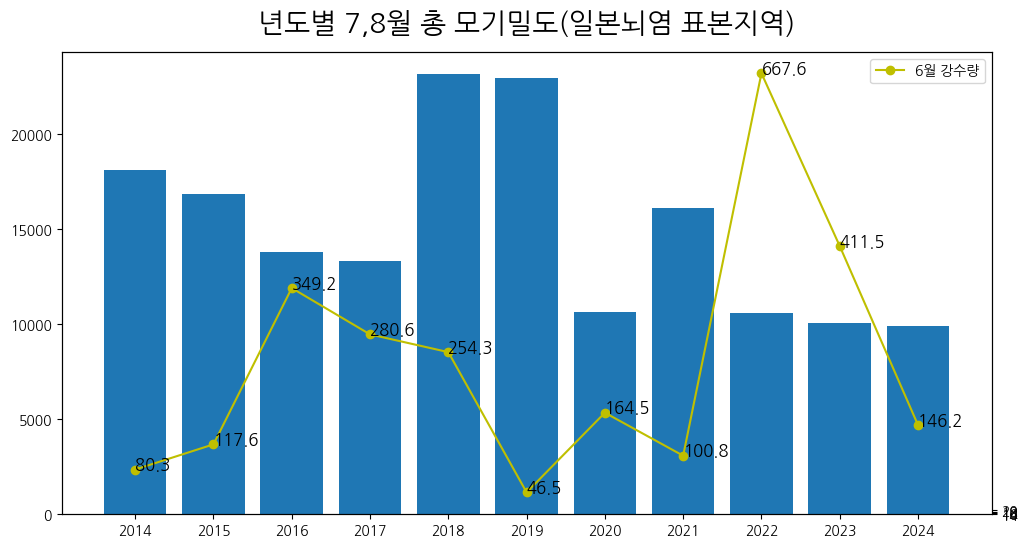

In [461]:
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.bar(jb_msDF.columns[:-2:2], jb_msDF.sum()[:-2:2], label='기간 내 최고기온')
# for i in range(0,len(jb_msDF.columns[:-2]),2):
#     plt.text(jb_msDF.columns[i], jb_msDF.sum()[i]+200, str(jb_msDF.idxmax()[i]) )
labels = list(range(2014,2025))
plt.xticks(jb_msDF.columns[:-2:2], labels=labels)

ax2 = ax1.twinx()

ax2.plot(jb_msDF.columns[:-2:2], rf3S, 'yo-', label='6월 강수량')
for i in range(0,int(len(jb_msDF.columns[:-2])/2)):
    plt.text(jb_msDF.columns[i*2], rf3S.iloc[i]+0.2, str(rf3S.iloc[i]),fontdict={'fontsize':12})
    
plt.yticks([14,16,18, 20])    
# plt.text(jb_msDF.columns[0], tem78SR.iloc[0], str(tem78SR.iloc[0]) )
plt.legend()
plt.title('년도별 7,8월 총 모기밀도(일본뇌염 표본지역)', fontdict={'fontsize':20}, pad=15)




Text(0.5, 1.0, '년도별 7,8월 총 모기밀도(일본뇌염 표본지역)')

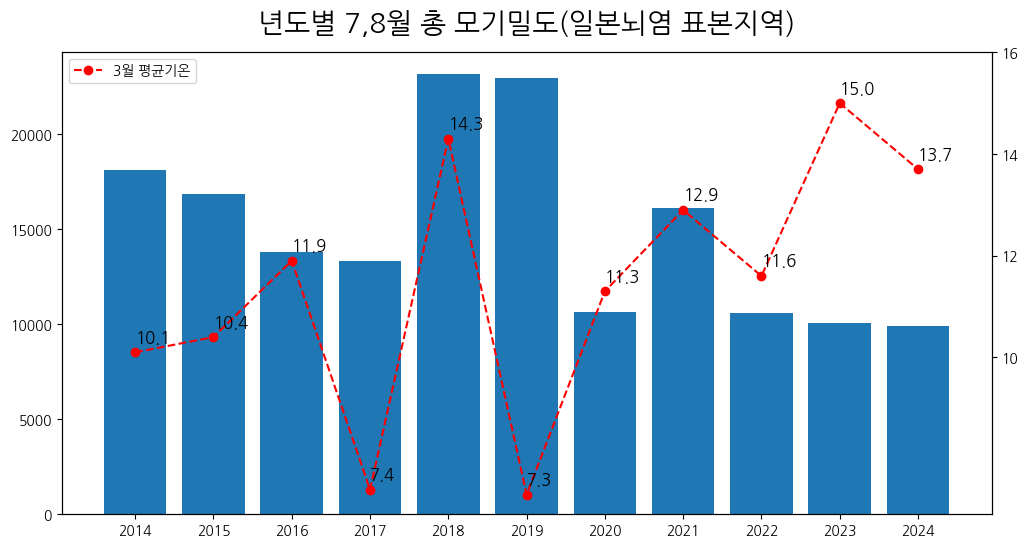

In [464]:
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.bar(jb_msDF.columns[:-2:2], jb_msDF.sum()[:-2:2], label='기간 내 최고기온')
# for i in range(0,len(jb_msDF.columns[:-2]),2):
#     plt.text(jb_msDF.columns[i], jb_msDF.sum()[i]+200, str(jb_msDF.idxmax()[i]) )
labels = list(range(2014,2025))
plt.xticks(jb_msDF.columns[:-2:2], labels=labels)

ax2 = ax1.twinx()
ax2.plot(jb_msDF.columns[:-2:2], tem3SR, 'ro--', label='3월 평균기온')
for i in range(0,int(len(jb_msDF.columns[:-2])/2)):
    plt.text(jb_msDF.columns[i*2], tem3SR.iloc[i]+0.2, str(tem3SR.iloc[i]),fontdict={'fontsize':12})


plt.yticks([10, 12,14,16])    
# plt.text(jb_msDF.columns[0], tem78SR.iloc[0], str(tem78SR.iloc[0]) )
plt.legend()
plt.title('년도별 7,8월 총 모기밀도(일본뇌염 표본지역)', fontdict={'fontsize':20}, pad=15)


In [430]:
jb_msDF.loc[41:44,:]

,2014 Total,2014 CT,2015 Total,2015 CT,2016년 전체모기,2016년 매개모기,2017년 전체모기,2017년 매개모기,2018년 전체모기,2018년 매개모기,...,2021전체,2021 매개모기,2022 전체모기,2022 매개모기,2023년 전체 모기,2023년 매개 모기,2024년 전체 모기,2024년 매개 모기,평년전체모기,평년매개모기
41,45,7,17,0,241,4,126,36,102,7,...,227,47,85,0,79,26,141,63,36,10
42,37,3,21,1,39,5,13,1,32,4,...,48,63,3,0,18,4,142,75,12,3
43,8,1,11,0,44,1,11,1,53,1,...,2,11,3,0,13,4,40,17,5,1
44,0,0,0,0,23,0,4,0,32,4,...,5,0,2,0,4,2,16,5,0,0


In [431]:
temp78_max_dict = {}
for i in range(2014,2025):
    max_idx = pjTempDF.loc[
        ((pjTempDF['연도']==i) & ((pjTempDF['주차']<=36) & (pjTempDF['주차']>=28))) ,
        '최고기온'].idxmax()
    temp78_max_dict[pjTempDF.loc[max_idx, '연도']] = pjTempDF.loc[max_idx, '최고기온']
tem78SR = pd.Series(temp78_max_dict)
tem78SR

2014    35.8
2015    35.0
2016    35.0
2017    34.9
2018    37.6
2019    34.7
2020    34.2
2021    35.1
2022    34.2
2023    33.4
2024    35.4
dtype: float64

In [432]:
# range(0,len(jb_msDF.columns[:-2]),2)
# tem78SR.iloc[0,0]

C:\Users\matdo\AppData\Local\Temp\ipykernel_1388\393629906.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Text(0.5, 1.0, '년도별 7,8월 총 모기밀도(일본뇌염 표본지역)')

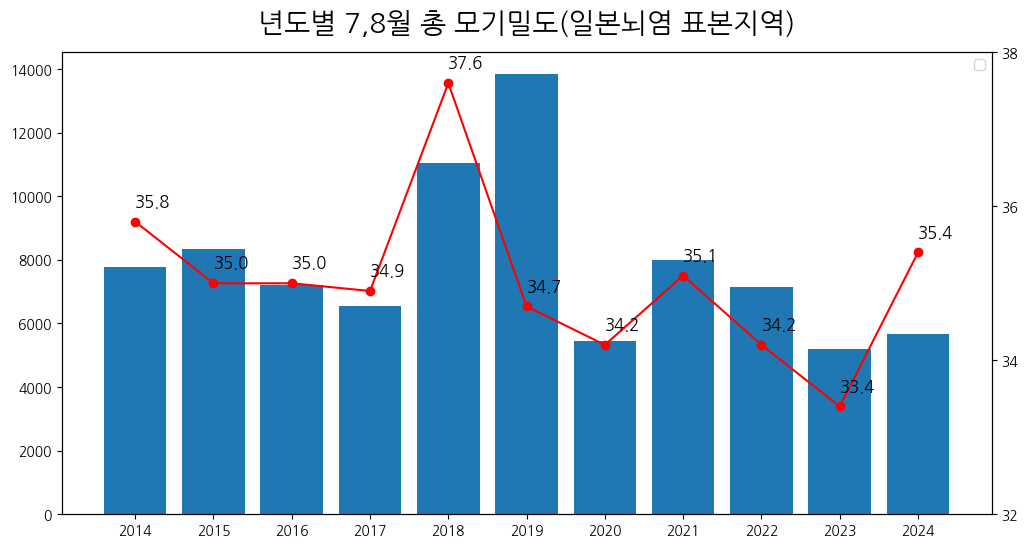

In [433]:
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.bar(jb_msDF.columns[:-2:2], jb_msDF.loc[28:36:].sum()[:-2:2], label='기간 내 최고기온')
labels = list(range(2014,2025))
plt.xticks(jb_msDF.columns[:-2:2], labels=labels)

ax2 = ax1.twinx()
ax2.plot(jb_msDF.columns[:-2:2], tem78SR, 'ro-')

for i in range(0,int(len(jb_msDF.columns[:-2])/2)):
    plt.text(jb_msDF.columns[i*2], tem78SR.iloc[i]+0.2, str(tem78SR.iloc[i]),fontdict={'fontsize':12})

plt.yticks([32,34,36,38])    
# plt.text(jb_msDF.columns[0], tem78SR.iloc[0], str(tem78SR.iloc[0]) )
plt.legend()
plt.title('년도별 7,8월 총 모기밀도(일본뇌염 표본지역)', fontdict={'fontsize':20}, pad=15)

In [434]:
temp910_max_dict = {}
for i in range(2014,2025):
    max_idx = pjTempDF.loc[
        ((pjTempDF['연도']==i) & ((pjTempDF['주차']<=44) & (pjTempDF['주차']>=37))) ,
        '최고기온'].idxmax()
    temp910_max_dict[pjTempDF.loc[max_idx, '연도']] = pjTempDF.loc[max_idx, '최고기온']
tem910SR = pd.Series(temp910_max_dict)
tem910SR

2014    29.5
2015    28.5
2016    30.4
2017    28.6
2018    28.4
2019    30.0
2020    27.3
2021    29.5
2022    30.7
2023    30.0
2024    34.5
dtype: float64

Text(0.5, 1.0, '년도별 9,10월 총 모기밀도(일본뇌염 표본지역)')

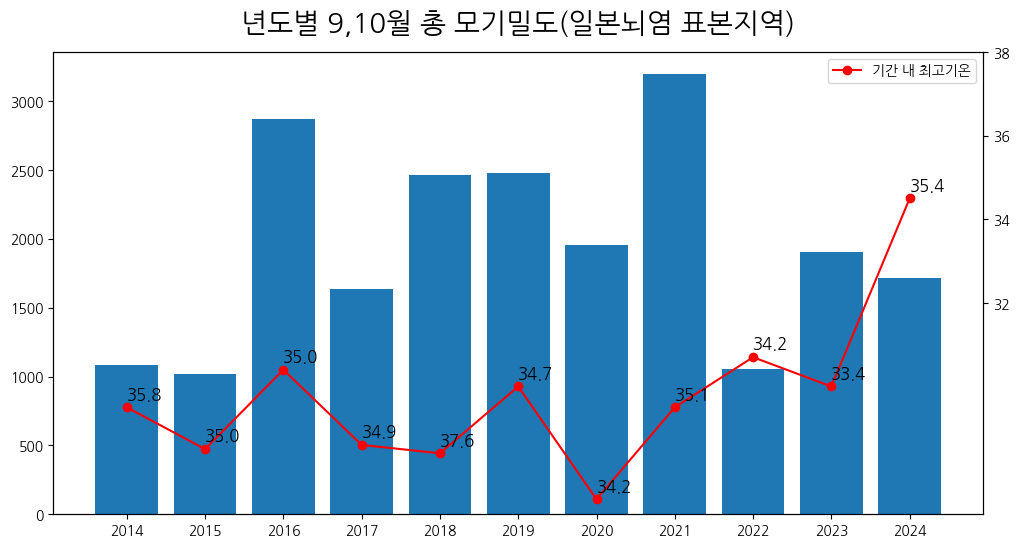

In [435]:
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.bar(jb_msDF.columns[:-2:2], jb_msDF.loc[37:44:].sum()[:-2:2])
labels = list(range(2014,2025))
plt.xticks(jb_msDF.columns[:-2:2], labels=labels)

ax2 = ax1.twinx()
ax2.plot(jb_msDF.columns[:-2:2], tem910SR, 'ro-', label='기간 내 최고기온')

for i in range(0,int(len(jb_msDF.columns[:-2])/2)):
    plt.text(jb_msDF.columns[i*2], tem910SR.iloc[i]+0.2, str(tem78SR.iloc[i]),fontdict={'fontsize':12})

plt.yticks([32,34,36,38])     
plt.legend()
plt.title('년도별 9,10월 총 모기밀도(일본뇌염 표본지역)', fontdict={'fontsize':20}, pad=15)

In [436]:
temp78_max_dict = {}
for i in range(2014,2025):
    max_idx = pjTempDF.loc[((pjTempDF['연도']==i) & ((pjTempDF['주차']<=44) & (pjTempDF['주차']>=41))) ,'최고기온'].idxmax()
    temp78_max_dict[pjTempDF.loc[max_idx, '연도']] = pjTempDF.loc[max_idx, '최고기온']
tem78SR = pd.Series(temp78_max_dict)
tem78SR

2014    29.0
2015    25.9
2016    24.5
2017    25.8
2018    21.3
2019    25.1
2020    22.8
2021    24.7
2022    23.1
2023    24.8
2024    24.7
dtype: float64

C:\Users\matdo\AppData\Local\Temp\ipykernel_1388\1376129615.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Text(0.5, 1.0, '년도별 10월 총 모기밀도(일본뇌염 표본지역)')

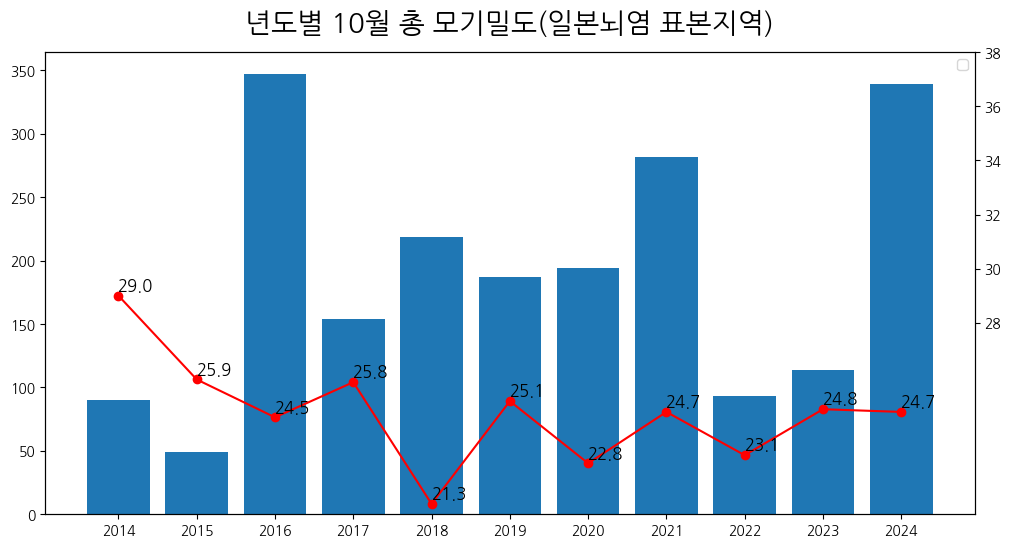

In [437]:
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.bar(jb_msDF.columns[:-2:2], jb_msDF.loc[41:44:].sum()[:-2:2], label='기간 내 최고기온')
labels = list(range(2014,2025))
plt.xticks(jb_msDF.columns[:-2:2], labels=labels)

ax2 = ax1.twinx()
ax2.plot(jb_msDF.columns[:-2:2], tem78SR, 'ro-')

for i in range(0,int(len(jb_msDF.columns[:-2])/2)):
    plt.text(jb_msDF.columns[i*2], tem78SR.iloc[i]+0.2, str(tem78SR.iloc[i]),fontdict={'fontsize':12})

plt.yticks([28,30,32,34,36,38])    
plt.legend()
plt.title('년도별 10월 총 모기밀도(일본뇌염 표본지역)', fontdict={'fontsize':20}, pad=15)

In [438]:
jb_msDF['2023년 전체 모기']

14      7
15      2
16      5
17      2
18     14
19     21
20    106
21    130
22    295
23    191
24    325
25    531
26    779
27    554
28    444
29    449
30    371
31    480
32    427
33    756
34    825
35    827
36    609
37    589
38    477
39    519
40    206
41     79
42     18
43     13
44      4
Name: 2023년 전체 모기, dtype: int32

In [439]:
for i in range(2014,2025):
    max_idx = pjTempDF.loc[pjTempDF['연도']==i,'최고기온' ].idxmax()
    print(pjTempDF.loc[max_idx, '연도'],pjTempDF.loc[max_idx, '주차'])

2014 31
2015 28
2016 32
2017 31
2018 31
2019 29
2020 26
2021 29
2022 30
2023 31
2024 33


In [440]:
temp_max_dict = {}
for i in range(2014,2025):
    max_idx = pjTempDF.loc[pjTempDF['연도']==i,'최고기온' ].idxmax()
    temp_max_dict[pjTempDF.loc[max_idx, '연도']] = pjTempDF.loc[max_idx, '주차']
temp_max_dict

{2014: 31,
 2015: 28,
 2016: 32,
 2017: 31,
 2018: 31,
 2019: 29,
 2020: 26,
 2021: 29,
 2022: 30,
 2023: 31,
 2024: 33}

C:\Users\matdo\AppData\Local\Temp\ipykernel_1388\1293572846.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(jb_msDF.columns[i], jb_msDF.idxmax()[i]-0.5, str(jb_msDF.idxmax()[i]) ,fontdict={'fontsize':16, 'color':'white', 'weight': 'bold'})
C:\Users\matdo\AppData\Local\Temp\ipykernel_1388\1293572846.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(jb_msDF.columns[i], jb_msDF.idxmax()[i]-0.5, str(jb_msDF.idxmax()[i]) ,fontdict={'fontsize':15, 'color':'black', 'weight': 'bold'})


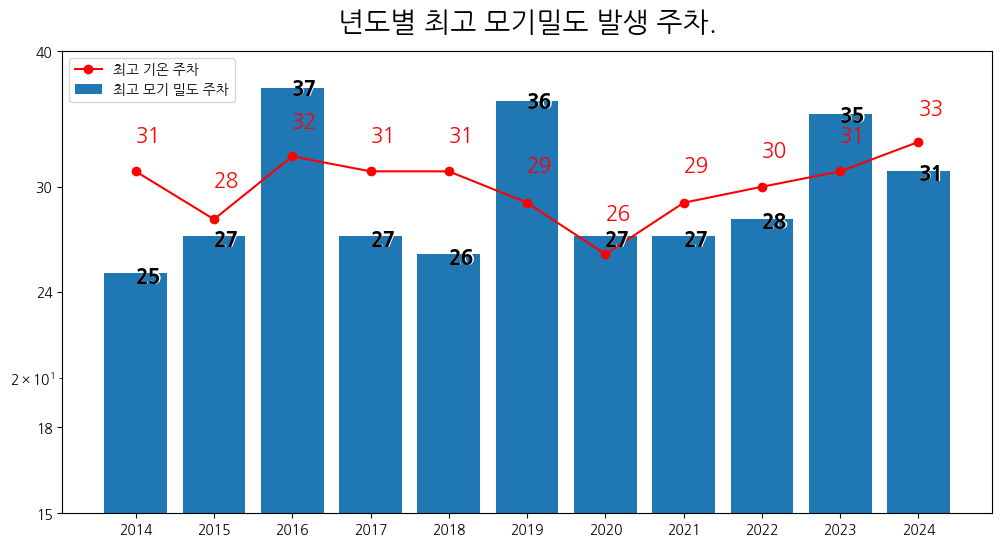

In [441]:
## max - 연별 최대치 찾아보기.
plt.figure(figsize=(12,6))
tmSR = pd.Series(temp_max_dict)
plt.plot(jb_msDF.columns[:-2:2], tmSR, 'ro-', label='최고 기온 주차')
for i in range(0,int(len(jb_msDF.columns[:-2])/2)):
    plt.text(jb_msDF.columns[i*2], tmSR.iloc[i]+2, str(tmSR.iloc[i]), fontdict={'fontsize':15, 'color':'r'})

plt.bar(jb_msDF.columns[:-2:2], jb_msDF.idxmax()[:-2:2], label='최고 모기 밀도 주차')
for i in range(0,len(jb_msDF.columns[:-2]),2):
    plt.text(jb_msDF.columns[i], jb_msDF.idxmax()[i]-0.5, str(jb_msDF.idxmax()[i]) ,fontdict={'fontsize':16, 'color':'white', 'weight': 'bold'})
    plt.text(jb_msDF.columns[i], jb_msDF.idxmax()[i]-0.5, str(jb_msDF.idxmax()[i]) ,fontdict={'fontsize':15, 'color':'black', 'weight': 'bold'})
    
        
labels = list(range(2014,2025))    
plt.xticks(jb_msDF.columns[:-2:2], labels=labels)
plt.yscale('log')  # 로그 스케일
plt.yticks([15,18,24,30, 40], labels=[15,18,24,30, 40])
plt.legend()
plt.title('년도별 최고 모기밀도 발생 주차.', fontdict={'fontsize':20}, pad=15)
plt.show()

In [442]:
rain_max_dict = {}
for i in range(2014,2025):
    max_idx = pjRainDF.loc[pjRainDF['연도']==i,'강수량' ].idxmax()
    rain_max_dict[pjRainDF.loc[max_idx, '연도']] = pjRainDF.loc[max_idx, '날짜'].month
rain_max_dict

{2014: 7,
 2015: 7,
 2016: 7,
 2017: 8,
 2018: 6,
 2019: 9,
 2020: 8,
 2021: 5,
 2022: 6,
 2023: 7,
 2024: 7}

C:\Users\matdo\AppData\Local\Temp\ipykernel_1388\3641561945.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(jb_msDF.columns[i], jb_msDF.idxmax()[i]+0.5, str(jb_msDF.idxmax()[i]) )


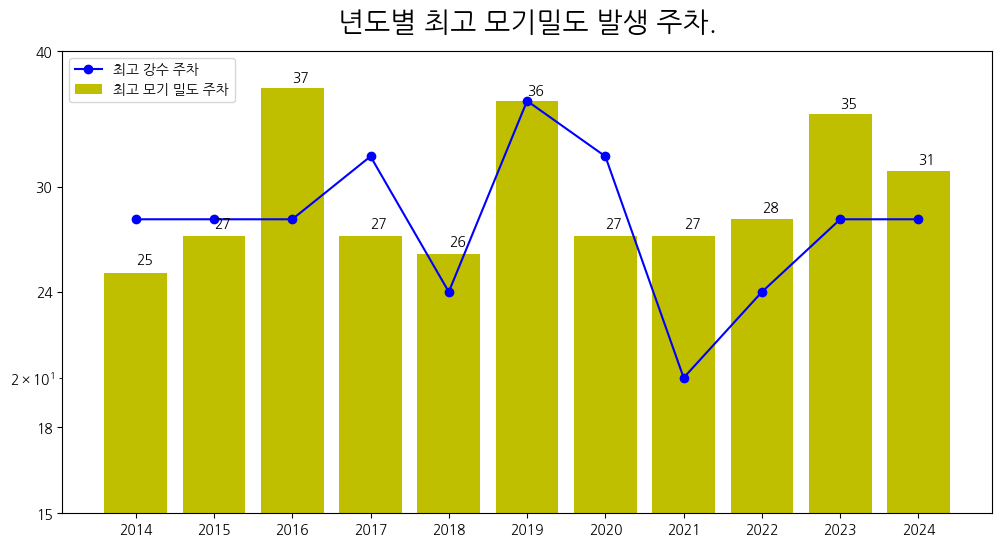

In [443]:
## max - 연별 최대치 찾아보기.
plt.figure(figsize=(12,6))
rfSR = pd.Series(rain_max_dict)*4
plt.plot(jb_msDF.columns[:-2:2], rfSR, 'bo-', label='최고 강수 주차')
# for i in range(0,len(jb_msDF.columns[:-2]),2):
#     plt.text(jb_msDF.columns[i], jb_msDF.idxmax()[i]+0.5, str(jb_msDF.idxmax()[i]) )

plt.bar(jb_msDF.columns[:-2:2], jb_msDF.idxmax()[:-2:2], label='최고 모기 밀도 주차', color='y')
for i in range(0,len(jb_msDF.columns[:-2]),2):
    plt.text(jb_msDF.columns[i], jb_msDF.idxmax()[i]+0.5, str(jb_msDF.idxmax()[i]) )
    
labels = list(range(2014,2025))    
plt.xticks(jb_msDF.columns[:-2:2], labels=labels)
plt.yscale('log')  # 로그 스케일
plt.yticks([15,18,24,30, 40], labels=[15,18,24,30, 40])
plt.legend()
plt.title('년도별 최고 모기밀도 발생 주차.', fontdict={'fontsize':20}, pad=15)
plt.show()

In [502]:
smDF = pd.DataFrame(pd.read_csv('./data/서울시 모기예보제 정보.csv', encoding='euc-kr',index_col=0))
smDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1664 entries, 2024-10-31 to 2016-05-01
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   모기지수(수변부)  1664 non-null   float64
 1   모기지수(주거지)  1664 non-null   float64
 2   모기지수(공원)   1664 non-null   float64
dtypes: float64(3)
memory usage: 52.0+ KB


In [503]:
smDF.index= pd.to_datetime(smDF.index)

In [504]:
smDF.head()
## 년별로 다른 사업체가 맡으므로, 년별로 그래프만 ㅏ살펴보기

,모기지수(수변부),모기지수(주거지),모기지수(공원)
모기지수 발생일,,,
2024-10-31,49.1,19.2,14.4
2024-10-30,54.9,19.8,14.0
2024-10-29,49.7,17.1,14.8
2024-10-28,66.0,26.7,21.2
2024-10-27,45.4,19.8,18.6


In [517]:
def sm_year(year1, month2=None, place1=None ):
    if place1 == 0:
        place1 = smDF.columns[0]
    elif place1 == 1:
        place1 = smDF.columns[1]
    elif place1 == 2:
        place1 = smDF.columns[2]
    else :
        place1 = smDF.columns
        
    if month2 is None:
        return smDF.loc[smDF.index.year == year1, place1]
    else:
        return smDF.loc[(smDF.index.year == year1) & 
                        (smDF.index.month == month2),place1]

In [527]:
sm_year(2016,None,3)

,모기지수(수변부),모기지수(주거지),모기지수(공원)
모기지수 발생일,,,
2016-10-31,118.0,118.0,118.0
2016-10-30,137.0,137.0,137.0
2016-10-29,172.3,172.3,172.3
2016-10-28,184.7,184.7,184.7
2016-10-27,207.2,207.2,207.2
...,...,...,...
2016-05-05,243.8,243.8,243.8
2016-05-04,256.2,256.2,256.2
2016-05-03,304.0,304.0,304.0


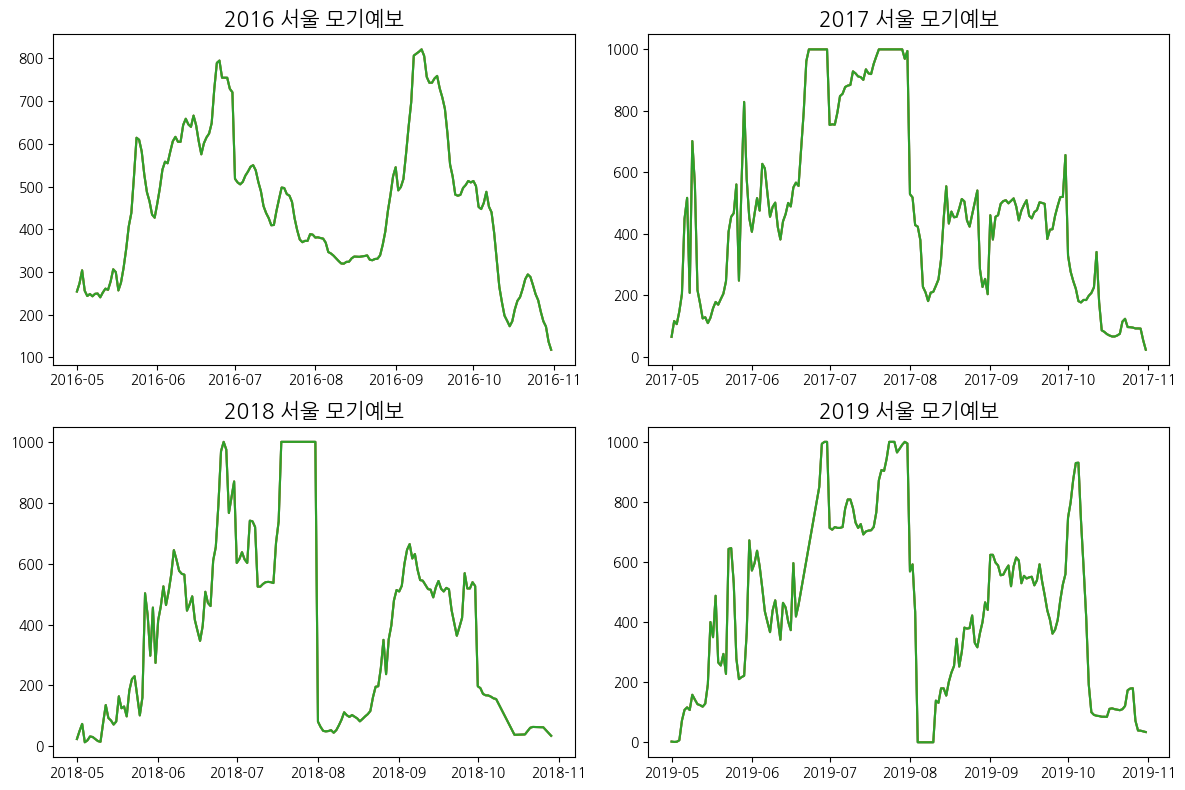

In [536]:
# 16 ~ 24
fig, ax = plt.subplots(2,2, figsize=(12,8))


data1 = sm_year(2016)
data2 = sm_year(2017)
data3 = sm_year(2018)
data4 = sm_year(2019)

ax[0,0].plot(sm_year(2016).index, data1)
ax[0,0].set_title('2016 서울 모기예보', fontdict={'fontsize':15} )

ax[0,1].plot(sm_year(2017).index, data2)
ax[0,1].set_title('2017 서울 모기예보', fontdict={'fontsize':15} )

ax[1,0].plot(sm_year(2018).index, data3)
ax[1,0].set_title('2018 서울 모기예보', fontdict={'fontsize':15} )

ax[1,1].plot(sm_year(2019).index, data4)
ax[1,1].set_title('2019 서울 모기예보', fontdict={'fontsize':15} )

plt.tight_layout()
plt.show()

In [ ]:
# 16 ~ 24
fig, ax = plt.subplots(2,2, figsize=(12,8))


data1 = sm_year(2016,10)
data2 = sm_year(2017,10)
data3 = sm_year(2018,10)
data4 = sm_year(2023,10)

ax[0,0].plot(sm_year(2016,10).index, data1)
ax[0,0].set_title('2016,10 서울 모기예보', fontdict={'fontsize':15} )

ax[0,1].plot(sm_year(2017,10).index, data2)
ax[0,1].set_title('2017,10 서울 모기예보', fontdict={'fontsize':15} )

ax[1,0].plot(sm_year(2018,10).index, data3)
ax[1,0].set_title('2018,10 서울 모기예보', fontdict={'fontsize':15} )

ax[1,1].plot(sm_year(2023,10).index, data4)
ax[1,1].set_title('2023,10 서울 모기예보', fontdict={'fontsize':15} )

plt.tight_layout()
plt.show()

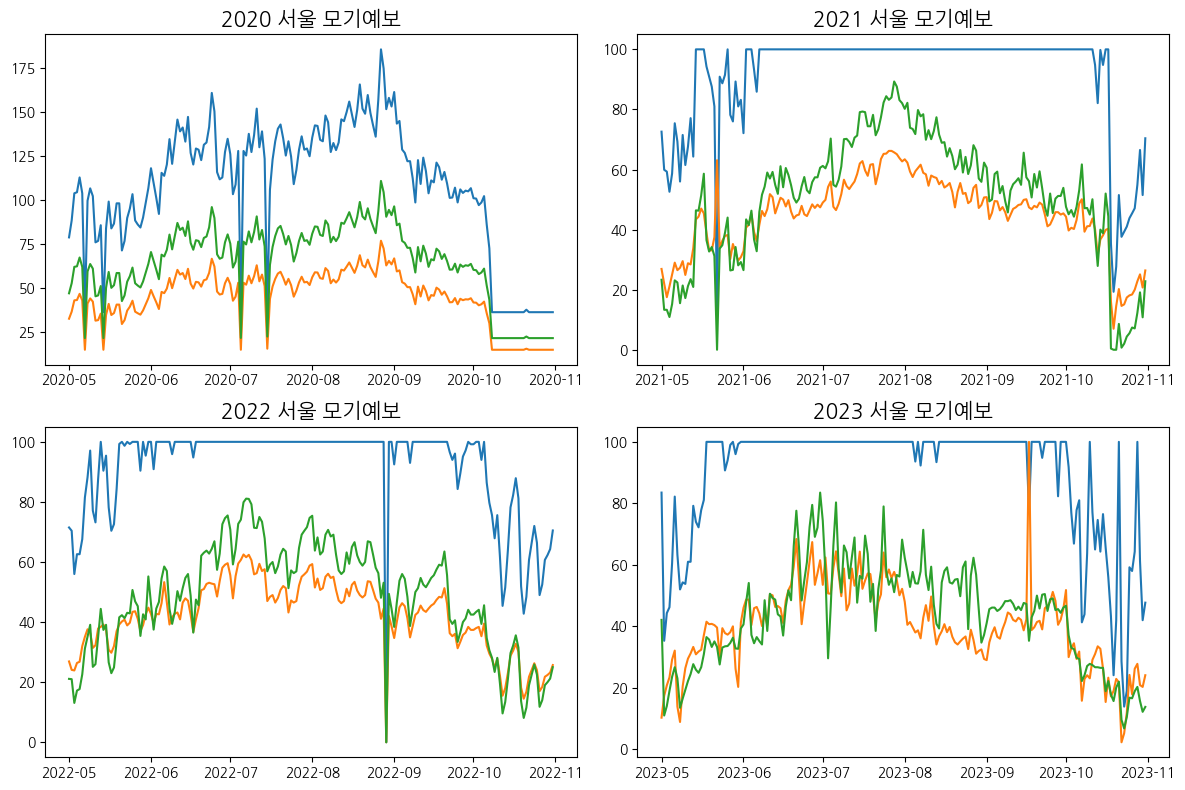

In [538]:
# 16 ~ 24
fig, ax = plt.subplots(2,2, figsize=(12,8))


data1 = sm_year(2020)
data2 = sm_year(2021)
data3 = sm_year(2022)
data4 = sm_year(2023)

ax[0,0].plot(sm_year(2020).index, data1)
ax[0,0].set_title('2020 서울 모기예보', fontdict={'fontsize':15} )

ax[0,1].plot(sm_year(2021).index, data2)
ax[0,1].set_title('2021 서울 모기예보', fontdict={'fontsize':15} )

ax[1,0].plot(sm_year(2022).index, data3)
ax[1,0].set_title('2022 서울 모기예보', fontdict={'fontsize':15} )

ax[1,1].plot(sm_year(2023).index, data4)
ax[1,1].set_title('2023 서울 모기예보', fontdict={'fontsize':15} )

plt.tight_layout()
plt.show()

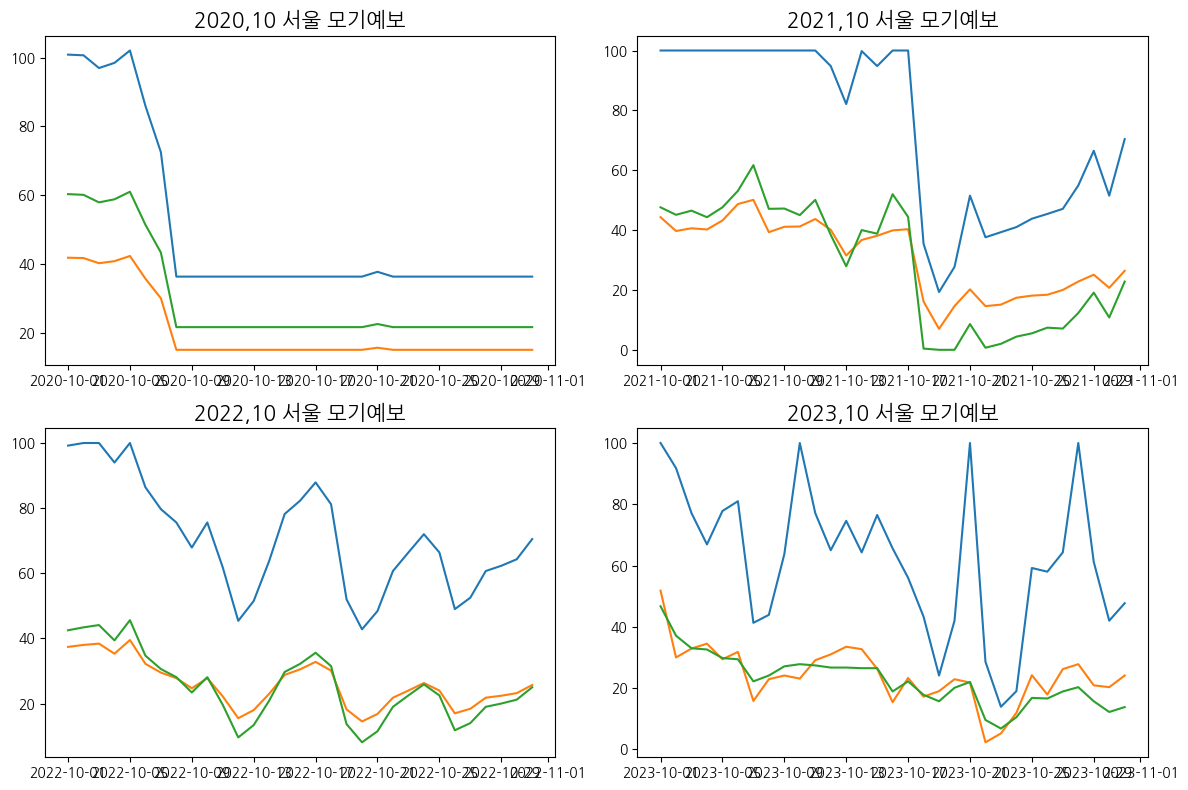

In [540]:
# 16 ~ 24
fig, ax = plt.subplots(2,2, figsize=(12,8))


data1 = sm_year(2020,10)
data2 = sm_year(2021,10)
data3 = sm_year(2022,10)
data4 = sm_year(2023,10)

ax[0,0].plot(sm_year(2020,10).index, data1)
ax[0,0].set_title('2020,10 서울 모기예보', fontdict={'fontsize':15} )

ax[0,1].plot(sm_year(2021,10).index, data2)
ax[0,1].set_title('2021,10 서울 모기예보', fontdict={'fontsize':15} )

ax[1,0].plot(sm_year(2022,10).index, data3)
ax[1,0].set_title('2022,10 서울 모기예보', fontdict={'fontsize':15} )

ax[1,1].plot(sm_year(2023,10).index, data4)
ax[1,1].set_title('2023,10 서울 모기예보', fontdict={'fontsize':15} )

plt.tight_layout()
plt.show()